In [ ]:
# install dependencies needed for recording videos
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=False, size=(1400, 900))
_ = display.start()

In [ ]:
!pip install gym
!pip install gym[box2d]
!pip install stable-baselines3[extra]

In [ ]:
!pip install pygame

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback

class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print(f"Num timesteps: {self.num_timesteps}")
                print(f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}")

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print(f"Saving new best model to {self.save_path}.zip")
                  self.model.save(self.save_path)

        return True

In [ ]:
import os

# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

In [ ]:
import gym
from car_racing import CarRacing
# env = gym.make("CarRacing-v0")
env = CarRacing()
env = Monitor(env, log_dir)

pygame 2.1.2 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
from stable_baselines3 import PPO

model = PPO("CnnPolicy", env, learning_rate=0.0003, n_steps=1024, batch_size=64, n_epochs=10, gamma=0.99, gae_lambda=0.95, clip_range=0.2, seed=8)
callback = SaveOnBestTrainingRewardCallback(check_freq=100, log_dir=log_dir)
model.learn(total_timesteps=10000, callback=callback)

Track generation: 1198..1502 -> 304-tiles track
Track generation: 1383..1733 -> 350-tiles track
Num timesteps: 10200
Best mean reward: -inf - Last mean reward per episode: -1057.19
Saving new best model to /tmp/gym/best_model.zip


In [ ]:
from PIL import Image
from gym.wrappers.monitoring.video_recorder import VideoRecorder
before_training = "before_training.mp4"

total_rewards = 0
rewards_per_frame = []
img = None

video = VideoRecorder(env, before_training)
# returns an initial observation
observation = env.reset()
for i in range(1000):
  env.render()
  video.capture_frame()

  action, _states = model.predict(observation.copy(), deterministic=True)
  observation, reward, done, info = env.step(action)
  total_rewards += reward
  rewards_per_frame.append(total_rewards)

  if i == 900:
    img = Image.fromarray(observation)

video.close()
env.close()

Track generation: 1191..1493 -> 302-tiles track


In [ ]:
from base64 import b64encode
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

In [ ]:
from IPython.display import HTML
html = render_mp4(before_training)
HTML(html)

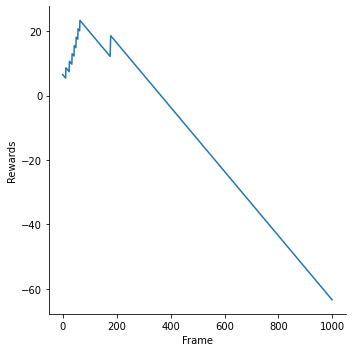

In [ ]:
rewards_data = {'Frame': np.arange(len(rewards_per_frame)), 'Rewards':rewards_per_frame}
rewards = pd.DataFrame(data=rewards_data)
sns.relplot(data=rewards, x="Frame", y="Rewards", kind="line")
plt.savefig('rewards_graph.png')

In [ ]:
model.predict(observation.copy(), deterministic=True)

(array([-0.13538373,  0.21389171,  0.        ], dtype=float32), None)

In [ ]:
env = CarRacing()
observation = env.reset()

Track generation: 1048..1320 -> 272-tiles track


In [ ]:
observation

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
model.predict(observation.copy(), deterministic=True)

(array([0.04656296, 0.09828851, 0.        ], dtype=float32), None)

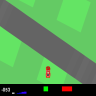

In [ ]:
img